# Extracting a Second Order Model

If we want to predict the behaviour of a measurement system over time, we need a differential equation model and for lots of $F=ma$ mechanical systems, that model should be second order, since acceleration is a second derivative. There are also plenty of other non-mechanical systems that follow a second order model pretty closely, so this approach is widely applicable. 


Apply a step function input to the measurement system and watch for overshoot. If there is overshoot and decay, then you need a second order model. Click the image to play a video of a simple system subject to a step change, with overshoot and damped oscillation.
<a href="http://www.youtube.com/watch?feature=player_embedded&v=-bEeVGgU-PI
" target="_blank"><img src="http://img.youtube.com/vi/-bEeVGgU-PI/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="480" height="360" border="10" /></a>

We'll start by generating some second order data on the assumption that we already know the parameters for the generic second order differential equation

\begin{equation}
\ddot{y}_m = K (y-y_m) - C \dot{y}_m
\end{equation}

where $y_m$ is the measured quantity output from the measurement system and $y$ is the actual value in the environment that is acting on the measurement device to produce some output. In concrete terms like our load cell lab, $y(t)$ is the mass of weights in the bucket at any given time and $y_m(t)$ is the mass that your code is calculating from the load cell voltage output.

If we know K and C, then we should be able to predict the response to a step function. Once we can do that, we'll try the reverse problem.

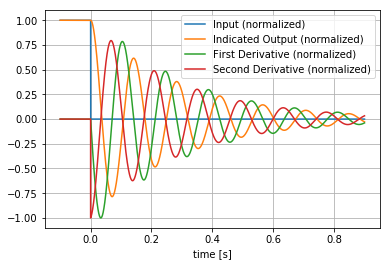

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

n=100000                    # number of time steps
tMax = 1                    # duration of time interval
t = np.linspace(-tMax/10,9*tMax/10,n) # one tenth before t = 0
y = t.copy()                # the forcing function from the surroundings
ym = t.copy()               # the measured output
ymd = t.copy()              # ym dot the first derivative with time
ymdd = t.copy()             # ym double dot, the second derivative with time
y[:round(n/10)] = 273       # Step function in applied forcing quantity
y[round(n/10):] = 0
ym[0] = y[0]                # initially we assume the sensor is in 
ymd[0] = 0                  # equilibrium with the surroundings
ymdd[0] = 0                 # not moving or accelerating
dt = tMax/n                 # time step magnitude

K=1987                      # a stiffness coefficient normally unknown in advance
                            # K = k/m for a linear mass spring damper system
C=6.87                      # a damping coefficient normally unknown in advance
                            # C = c/m for a linear mass spring damper system

for i in range(1,n):
    # measure changes based on old firts derivative
    ym[i] = ym[i-1] + ymd[i-1] * dt
    # first derivative changes based on old second derivative
    ymd[i] = ymd[i-1] + ymdd[i-1] * dt
    # second derivative driven by stiffness and difference, slowed by damping 
    ymdd[i] = K * (y[i] - ym[i]) - C * ymd[i] 
plt.plot(t,y/max(abs(y)),label = 'Input (normalized)')
plt.plot(t,ym/max(abs(y)),label = 'Indicated Output (normalized)')
plt.plot(t,ymd/max(abs(ymd)),label = 'First Derivative (normalized)')
plt.plot(t,ymdd/max(abs(ymdd)),label = 'Second Derivative (normalized)')
plt.xlabel('time [s]')
plt.legend(loc=1)
plt.grid()

Ym = ym.copy()  # save a copy for comparison



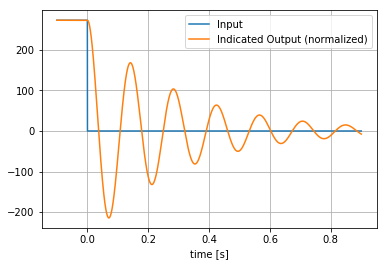

In [5]:
plt.plot(t,y,label = 'Input')
plt.plot(t,Ym,label = 'Indicated Output (normalized)')
plt.xlabel('time [s]')
plt.legend(loc=1)
plt.grid()


## Estimate parameters K and C from measured response

Now start guessing, by setting the stiffness parameter to get the frequency right, then setting the damping parameter to get the decay right. In this case we should be able to get a perfect match because we have perfect data to start from, but in the real world you won't be able to get a perfect fit and will need to apply some judgement.

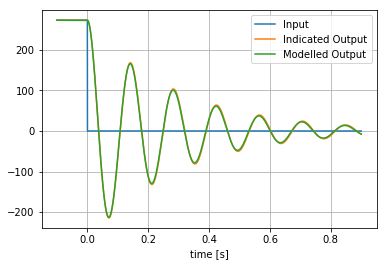

In [6]:
K=2000                     # a stiffness coefficient normally unknown in advance
C=7.1                         # a damping coefficient normally unknown in advance


for i in range(1,n):
    # measure changes based on old firts derivative
    ym[i] = ym[i-1] + ymd[i-1] * dt
    # first derivative changes based on old second derivative
    ymd[i] = ymd[i-1] + ymdd[i-1] * dt
    # second derivative driven by stiffness and difference, slowed by damping 
    ymdd[i] = K * (y[i] - ym[i]) - C * ymd[i] 
plt.plot(t,y,label = 'Input')
plt.plot(t,Ym,label = 'Indicated Output')
plt.plot(t,ym,label = 'Modelled Output')
plt.xlabel('time [s]')
plt.legend(loc=1)
plt.grid()



The natural frequency is $\omega_n = \sqrt{K}$ and is in radians per second for mks units. (Fun Facts from MTHE 225 or any other ODEs course) Check to see if it matches up!

In [7]:
wn = np.sqrt(K)
wnHz = wn /6.28
period = 1. / wnHz
print("The natural frequency should be %d rad/s or %d Hz,"%(wn,wnHz),
      "so the period should be %6.4f seconds"%period)

The natural frequency should be 44 rad/s or 7 Hz, so the period should be 0.1404 seconds


## Use K and C to predict response to a more complicated transient

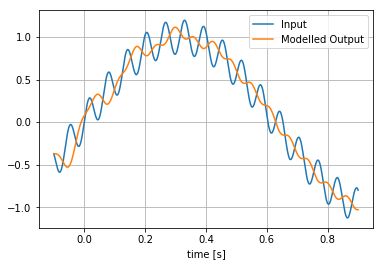

In [8]:
y = np.sin(t*5)+0.2*np.sin(t*100)
ym[0] = y[0]
ymd[0] = ymdd[0] = 0
for i in range(1,n):
    # measure changes based on old first derivative
    ym[i] = ym[i-1] + ymd[i-1] * dt
    # first derivative changes based on old second derivative
    ymd[i] = ymd[i-1] + ymdd[i-1] * dt
    # second derivative driven by stiffness and difference, slowed by damping 
    ymdd[i] = K * (y[i] - ym[i]) - C * ymd[i] 
plt.plot(t,y,label = 'Input')
plt.plot(t,ym,label = 'Modelled Output')
plt.xlabel('time [s]')
plt.legend(loc=1)
plt.grid()
